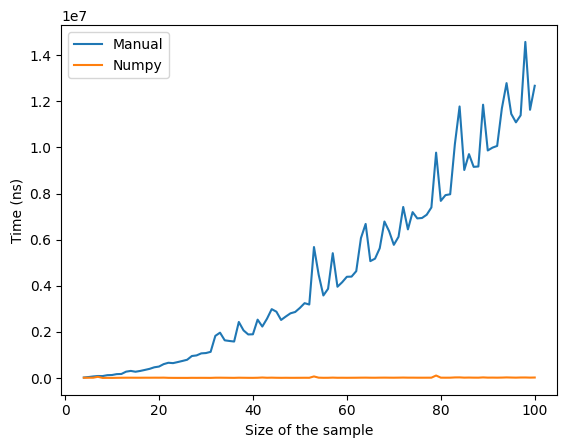

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

def manual_dft(x, N):
    dft_result = []
    for i in range(N):
        s = 0
        for j in range(N):
            s += x[j] * np.exp(-1j * 2 * np.pi * i * j / N)
        dft_result.append(s / (N)**0.5)
    return dft_result

manual_runtimes = []
numpy_runtimes = []
sample_sizes = []
iterations = 50

for sample_size in range(4, 101):
    manual_times = []
    numpy_times = []
    for _ in range(iterations):
        x = [np.random.randint(0, 10) for _ in range(sample_size)]
        N = len(x)
        
        start_manual = time.time_ns()
        manual_dft_result = manual_dft(x, N)
        end_manual = time.time_ns()
        
        start_numpy = time.time_ns()
        numpy_dft_result = np.fft.fft(x, norm='ortho')
        end_numpy = time.time_ns()
        
        manual_times.append(end_manual - start_manual)
        numpy_times.append(end_numpy - start_numpy)
    
    manual_runtimes.append(sum(manual_times) / len(manual_times))
    numpy_runtimes.append(sum(numpy_times) / len(numpy_times))
    sample_sizes.append(sample_size)

plt.plot(sample_sizes, manual_runtimes, label='Manual')
plt.plot(sample_sizes, numpy_runtimes, label='Numpy')
plt.xlabel('Size of the sample')
plt.ylabel('Time (ns)')
plt.legend()
plt.show()
